In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split



In [2]:
df=pd.read_csv('/home/ubuntu/acoustic_stuff/hindi-acoustic-word-embedding/dataset/train_aligned_dataset/metadata.csv')


In [12]:
df = df.rename(columns={'transcrip': 'transcript'})


In [14]:
df.to_csv('/home/ubuntu/acoustic_stuff/hindi-acoustic-word-embedding/dataset/train_aligned_dataset/metadata.csv')

In [15]:
df.columns

Index(['audio_path', 'transcript', 'duration'], dtype='object')

In [11]:
df.columns

Index(['audio_path', 'transcrip', 'duration'], dtype='object')

In [8]:
df.to_csv('/home/ubuntu/acoustic_stuff/hindi-acoustic-word-embedding/dataset/train_aligned_dataset/metadata.csv')

In [9]:
df.columns 

Index(['audio_path', 'transcrip', 'duration'], dtype='object')

In [16]:
unique_words=set(list(df['transcript']))

In [17]:
len(unique_words)

24634

In [18]:
from collections import Counter
word_counts = Counter(df['transcript'])



In [19]:
word_counts

Counter({'के': 9343,
         'है': 8385,
         'में': 7929,
         'की': 6205,
         'को': 4384,
         'से': 4259,
         'का': 3742,
         'हैं': 3200,
         'ने': 2917,
         'और': 2855,
         'पर': 2719,
         'भी': 2567,
         'एक': 2099,
         'इस': 2061,
         'लिए': 1758,
         'कि': 1478,
         'नहीं': 1446,
         'किया': 1433,
         'यह': 1337,
         'ही': 1335,
         'कर': 1318,
         'गया': 1201,
         'था': 1076,
         'हो': 1040,
         'साथ': 905,
         'बाद': 836,
         'करने': 813,
         'दिया': 700,
         'इसके': 668,
         'रहा': 662,
         'रहे': 656,
         'उन्होंने': 638,
         'रही': 628,
         'अपने': 604,
         'गई': 587,
         'तो': 577,
         'कहा': 565,
         'थी': 564,
         'थे': 561,
         'जा': 550,
         'कुछ': 535,
         'वह': 516,
         'जाता': 504,
         'पुलिस': 499,
         'कई': 458,
         'तक': 449,
         'अब': 434,
  

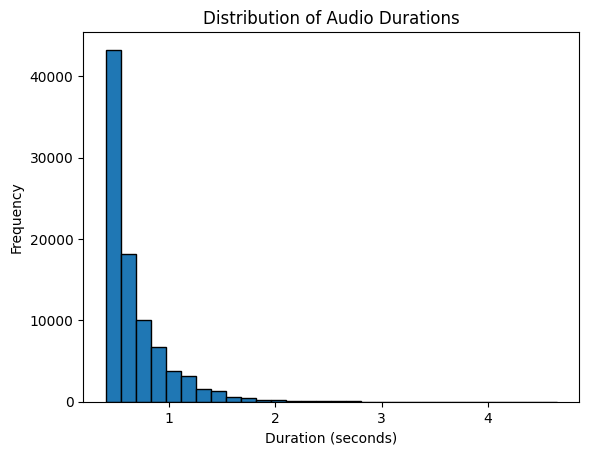

In [25]:
import numpy as np
import librosa
import os 
# Calculate audio durations
durations = []
for audio_name in sampled_df['audio_path']:
    root_path='/home/ubuntu/acoustic_stuff/hindi-acoustic-word-embedding/dataset/train_aligned_dataset'
    audio_path=os.path.join(root_path,audio_name)
    y, sr = librosa.load(audio_path, sr=8000)
    durations.append(len(y) / sr)

# Plot the distribution of audio durations
plt.hist(durations, bins=30, edgecolor='black')
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

In [25]:
import os
import librosa

def filter_short_audios(metadata, min_duration=0.2):
    durations = []
    short_audios = []
    short_audio_transcript=[]

    for i in range(len(metadata)):
        root_path='/home/ubuntu/acoustic_stuff/hindi-acoustic-word-embedding/dataset/train_aligned_dataset'
        audio_name=metadata['audio_path'][i]
        transcript=metadata['transcript'][i]
        audio_path=os.path.join(root_path,str(audio_name))
        y, sr = librosa.load(audio_path, sr=None)
        duration = len(y) / sr
        durations.append(duration)
        
        if duration <= min_duration:
            short_audios.append(audio_name)
            short_audio_transcript.append(transcript)

    # Filter out short audios from metadata
    filtered_metadata = metadata[~metadata['audio_path'].isin(short_audios)]

    return filtered_metadata, short_audios,short_audio_transcript




In [22]:
import os
import librosa
import pandas as pd

def filter_short_audios(metadata, min_duration=0.4):
    root_path = '/home/ubuntu/acoustic_stuff/hindi-acoustic-word-embedding/dataset/train_aligned_dataset'
    
    indices_to_drop = []

    for i in range(len(metadata)):
        audio_name = metadata['audio_path'][i]
        audio_path = os.path.join(root_path, str(audio_name))
        y, sr = librosa.load(audio_path, sr=None)
        duration = len(y) / sr

        if duration <= min_duration:
            indices_to_drop.append(i)

    # Drop rows with short audio durations
    filtered_metadata = metadata.drop(indices_to_drop).reset_index(drop=True)

    return filtered_metadata


In [23]:
sampled_df=filter_short_audios(df)

In [24]:
len(sampled_df)

89807

In [38]:
from collections import Counter
word_counts_sampled = Counter(sampled_df['transcript'])

In [39]:
word_counts_sampled

Counter({'है': 4814,
         'हैं': 1868,
         'इस': 969,
         'था': 648,
         'यह': 635,
         'उन्होंने': 591,
         'इसके': 531,
         'गया': 368,
         'किया': 368,
         'थी': 345,
         'थे': 335,
         'लेकिन': 305,
         'सरकार': 278,
         'एक': 244,
         'साथ': 227,
         'पुलिस': 218,
         'की': 218,
         'भारत': 216,
         'चाहिए': 215,
         'दिया': 203,
         'होगा': 196,
         'इससे': 184,
         'भारतीय': 183,
         'करने': 180,
         'इन': 178,
         'वह': 176,
         'गई': 168,
         'हालांकि': 167,
         'जाएगा': 165,
         'जानकारी': 161,
         'सबसे': 156,
         'दौरान': 155,
         'कांग्रेस': 154,
         'पहले': 154,
         'अब': 154,
         'सकता': 150,
         'उनके': 149,
         'ये': 147,
         'बताया': 144,
         'और': 140,
         'यहां': 140,
         'इसी': 138,
         'इसमें': 134,
         'ऐसे': 133,
         'प्रदेश': 132,
         'क्षेत

In [28]:
sampled_df.head()

,audio_path,transcript,duration
0,844424933492471-705-m_seg_0.wav,पिछली,0.000-0.926 sec
1,844424933492471-705-m_seg_2.wav,शताब्दियों,1.289-2.175 sec
2,844424933492471-705-m_seg_5.wav,विस्तृत,2.739-3.302 sec
3,844424933492471-705-m_seg_7.wav,बनकर,3.785-4.188 sec
4,844424933492471-705-m_seg_9.wav,है,4.551-5.155 sec


In [40]:
def normalize_frequency(df, frequency_counter, max_freq=200):
    transcript_counts = Counter(df['transcript'])
    
    while any(transcript_counts[transcript] > max_freq for transcript in transcript_counts):
        for transcript in list(transcript_counts):
            while transcript_counts[transcript] > max_freq:
                idx_to_remove = df[df['transcript'] == transcript].index[0]
                
                df = df.drop(index=idx_to_remove)
                
                transcript_counts[transcript] -= 1
    return df

In [41]:
reduced_df=normalize_frequency(sampled_df,word_counts_sampled)

In [42]:
len(reduced_df)


80211

In [43]:
word_counts_reduced=Counter(reduced_df['transcript'])

In [45]:
word_counts_sampled['दिया']

203

In [44]:
word_counts_reduced

Counter({'दिया': 200,
         'पुलिस': 200,
         'भारत': 200,
         'चाहिए': 200,
         'की': 200,
         'साथ': 200,
         'एक': 200,
         'सरकार': 200,
         'लेकिन': 200,
         'थे': 200,
         'थी': 200,
         'किया': 200,
         'गया': 200,
         'इसके': 200,
         'था': 200,
         'उन्होंने': 200,
         'यह': 200,
         'इस': 200,
         'हैं': 200,
         'है': 200,
         'होगा': 196,
         'इससे': 184,
         'भारतीय': 183,
         'करने': 180,
         'इन': 178,
         'वह': 176,
         'गई': 168,
         'हालांकि': 167,
         'जाएगा': 165,
         'जानकारी': 161,
         'सबसे': 156,
         'दौरान': 155,
         'कांग्रेस': 154,
         'पहले': 154,
         'अब': 154,
         'सकता': 150,
         'उनके': 149,
         'ये': 147,
         'बताया': 144,
         'और': 140,
         'यहां': 140,
         'इसी': 138,
         'इसमें': 134,
         'ऐसे': 133,
         'प्रदेश': 132,
         'क्षेत्र

In [6]:
root_path='/home/ubuntu/acoustic_stuff/hindi-acoustic-word-embedding/dataset/train_aligned_dataset'
#reduced_df.to_csv(os.path.join(root_path,'reduced_metadata.csv'))

In [3]:
reduced_df=pd.read_csv('/home/ubuntu/acoustic_stuff/hindi-acoustic-word-embedding/dataset/train_aligned_dataset/reduced_metadata.csv')

In [4]:
len(reduced_df)

80211

In [5]:
reduced_df.head()

,Unnamed: 0,audio_path,transcript,duration
0,0,844424933492471-705-m_seg_0.wav,पिछली,0.000-0.926 sec
1,1,844424933492471-705-m_seg_2.wav,शताब्दियों,1.289-2.175 sec
2,2,844424933492471-705-m_seg_5.wav,विस्तृत,2.739-3.302 sec
3,3,844424933492471-705-m_seg_7.wav,बनकर,3.785-4.188 sec
4,6,844424930827743-329-f_seg_6.wav,विकास,2.255-2.698 sec


In [8]:
train_data, dev_data = train_test_split(reduced_df, test_size=0.1)

In [9]:
len(train_data)

72189

In [10]:
len(dev_data)

8022

In [12]:
import os
train_data.to_csv(os.path.join(root_path,"train_reduced_data.csv"))
dev_data.to_csv(os.path.join(root_path,"reduced_dev_data.csv"))

In [2]:
#denoiser 
import torch 
torch.set_num_threads(1)

from IPython.display import Audio
from pprint import pprint

torch.hub.download_url_to_file('https://models.silero.ai/vad_models/en.wav','en_example.wav')

100%|██████████| 1.83M/1.83M [00:00<00:00, 2.09MB/s]


In [3]:
model, utils = torch.hub.load(repo_or_dir='snakers4/silero-vad',
                              model='silero_vad',
                              force_reload=True)

/home/ubuntu/acoustic_stuff/venv/lib/python3.11/site-packages/torch/hub.py:293: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/snakers4/silero-vad/zipball/master" to /home/ubuntu/.cache/torch/hub/master.zip


In [ ]:

sampling_rate = 16000 # also accepts 8000
wav = read_audio('en_example.wav', sampling_rate=sampling_rate)